<a href="https://colab.research.google.com/github/Noob919/ResearchProject/blob/main/Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install dask
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import dask.dataframe as dd

In [3]:
cols_to_read = ['Down.Up.Ratio','Total.Length.of.Bwd.Packets','act_data_pkt_fwd', 'Fwd.IAT.Min',
                'Bwd.IAT.Total','ProtocolName']
data  = pd.read_csv("/content/drive/MyDrive/DataResearch/Dataset-Unicauca-Version2-87Atts.csv", usecols=cols_to_read)
data.head()

,Total.Length.of.Bwd.Packets,Fwd.IAT.Min,Bwd.IAT.Total,Down.Up.Ratio,act_data_pkt_fwd,ProtocolName
0,110414.0,698.0,41178.0,2,21,HTTP_PROXY
1,0.0,1.0,0.0,0,1,HTTP_PROXY
2,0.0,0.0,0.0,0,1,HTTP
3,0.0,0.0,107.0,3,0,HTTP
4,0.0,0.0,0.0,0,4,HTTP_PROXY


In [4]:
cols_to_read = ['Down.Up.Ratio','Total.Length.of.Bwd.Packets','act_data_pkt_fwd', 'Fwd.IAT.Min',
                'Bwd.IAT.Total','ProtocolName']
len(cols_to_read)

6

In [5]:
training_dataframes = dd.read_csv("/content/drive/MyDrive/DataResearch/Dataset-Unicauca-Version2-87Atts.csv", usecols= cols_to_read,assume_missing=True)

In [6]:
training_dataframes.columns

Index(['Total.Length.of.Bwd.Packets', 'Fwd.IAT.Min', 'Bwd.IAT.Total',
       'Down.Up.Ratio', 'act_data_pkt_fwd', 'ProtocolName'],
      dtype='object')

In [7]:
training_dataframes.head()

,Total.Length.of.Bwd.Packets,Fwd.IAT.Min,Bwd.IAT.Total,Down.Up.Ratio,act_data_pkt_fwd,ProtocolName
0,110414.0,698.0,41178.0,2.0,21.0,HTTP_PROXY
1,0.0,1.0,0.0,0.0,1.0,HTTP_PROXY
2,0.0,0.0,0.0,0.0,1.0,HTTP
3,0.0,0.0,107.0,3.0,0.0,HTTP
4,0.0,0.0,0.0,0.0,4.0,HTTP_PROXY


In [8]:
list_of_protocols = ["HTTP", "HTTP_PROXY", "HTTP_CONNECT", "SSL", "GOOGLE", "YOUTUBE", "FACEBOOK", "CONTENT_FLASH"]

filtered_dataframe = training_dataframes[training_dataframes['ProtocolName'].isin(list_of_protocols)].compute()

In [9]:
filtered_dataframe['ProtocolName'].value_counts()

GOOGLE           959110
HTTP             683734
HTTP_PROXY       623210
SSL              404883
HTTP_CONNECT     317526
YOUTUBE          170781
FACEBOOK          29033
CONTENT_FLASH      8589
Name: ProtocolName, dtype: int64

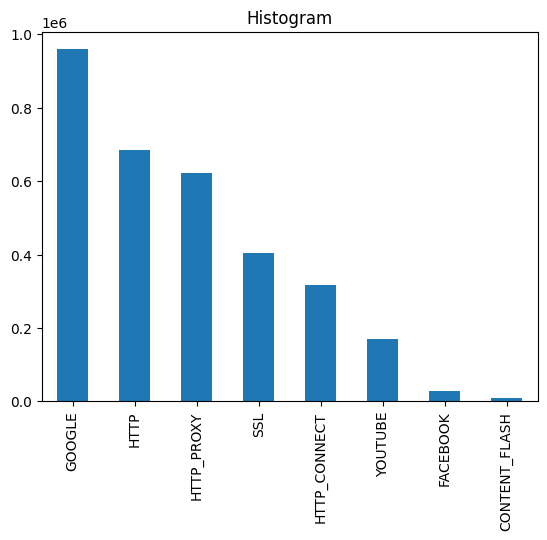

In [10]:
# Compute the histogram using Dask and convert it to Pandas for plotting
histogram = filtered_dataframe['ProtocolName'].value_counts()

# Create a bar plot (histogram)
histogram.plot(kind='bar', title='Histogram')
plt.show()

In [11]:
# Group the DataFrame by 'ProtocolName' and select the top 200 rows for each group
result_dataframe = (
    filtered_dataframe.groupby('ProtocolName')
    .head(200)
)

# If you want to reset the index
result_dataframe = result_dataframe.reset_index(drop=True)

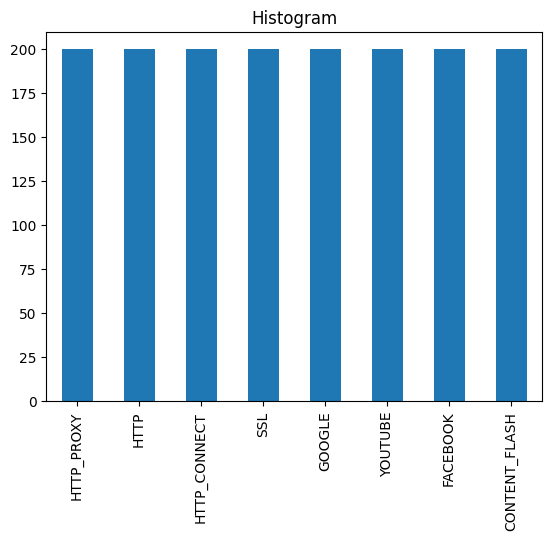

In [12]:
# Compute the histogram using Dask and convert it to Pandas for plotting
histogram = result_dataframe['ProtocolName'].value_counts()

# Create a bar plot (histogram)
histogram.plot(kind='bar', title='Histogram')
plt.show()

In [13]:
iot1_column =["HTTP", "HTTP_PROXY", "HTTP_CONNECT", "SSL"]
iot1_dataframe = result_dataframe[result_dataframe['ProtocolName'].isin(iot1_column)]
iot1_dataframe.head(5)

,Total.Length.of.Bwd.Packets,Fwd.IAT.Min,Bwd.IAT.Total,Down.Up.Ratio,act_data_pkt_fwd,ProtocolName
0,110414.0,698.0,41178.0,2.0,21.0,HTTP_PROXY
1,0.0,1.0,0.0,0.0,1.0,HTTP_PROXY
2,0.0,0.0,0.0,0.0,1.0,HTTP
3,0.0,0.0,107.0,3.0,0.0,HTTP
4,0.0,0.0,0.0,0.0,4.0,HTTP_PROXY


In [14]:
# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'ProtocolName' column
iot1_dataframe['ProtocolName_encoded'] = label_encoder.fit_transform(iot1_dataframe['ProtocolName'])


<ipython-input-14-17d1214161cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iot1_dataframe['ProtocolName_encoded'] = label_encoder.fit_transform(iot1_dataframe['ProtocolName'])


In [15]:
iot1_dataframe

,Total.Length.of.Bwd.Packets,Fwd.IAT.Min,Bwd.IAT.Total,Down.Up.Ratio,act_data_pkt_fwd,ProtocolName,ProtocolName_encoded
0,110414.0,698.0,41178.0,2.0,21.0,HTTP_PROXY,2
1,0.0,1.0,0.0,0.0,1.0,HTTP_PROXY,2
2,0.0,0.0,0.0,0.0,1.0,HTTP,0
3,0.0,0.0,107.0,3.0,0.0,HTTP,0
4,0.0,0.0,0.0,0.0,4.0,HTTP_PROXY,2
...,...,...,...,...,...,...,...
1066,833.0,1007.0,258205.0,2.0,4.0,HTTP_PROXY,2
1067,901417.0,0.0,1015626.0,3.0,90.0,HTTP_PROXY,2
1068,194735.0,0.0,173918.0,2.0,20.0,HTTP_PROXY,2
1070,248307.0,89.0,871761.0,6.0,22.0,HTTP_PROXY,2


In [16]:
iot2_column =["GOOGLE", "YOUTUBE", "FACEBOOK", "CONTENT_FLASH"]
iot2_dataframe = result_dataframe[result_dataframe['ProtocolName'].isin(iot2_column)]
# Fit and transform the 'ProtocolName' column
iot2_dataframe['ProtocolName_encoded'] = label_encoder.fit_transform(iot2_dataframe['ProtocolName'])
iot2_dataframe

<ipython-input-16-401b20ca3cd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iot2_dataframe['ProtocolName_encoded'] = label_encoder.fit_transform(iot2_dataframe['ProtocolName'])


,Total.Length.of.Bwd.Packets,Fwd.IAT.Min,Bwd.IAT.Total,Down.Up.Ratio,act_data_pkt_fwd,ProtocolName,ProtocolName_encoded
9,0.0,1.0,0.0,0.0,5.0,GOOGLE,2
19,0.0,1.0,0.0,0.0,0.0,GOOGLE,2
20,0.0,0.0,30.0,2.0,1.0,GOOGLE,2
24,2802.0,249.0,9811.0,3.0,3.0,GOOGLE,2
36,0.0,0.0,0.0,0.0,13.0,YOUTUBE,3
...,...,...,...,...,...,...,...
1595,4181.0,0.0,610187.0,0.0,2.0,CONTENT_FLASH,0
1596,1067.0,0.0,623612.0,0.0,2.0,CONTENT_FLASH,0
1597,4296.0,0.0,558162.0,0.0,2.0,CONTENT_FLASH,0
1598,3321.0,2.0,554314.0,0.0,2.0,CONTENT_FLASH,0


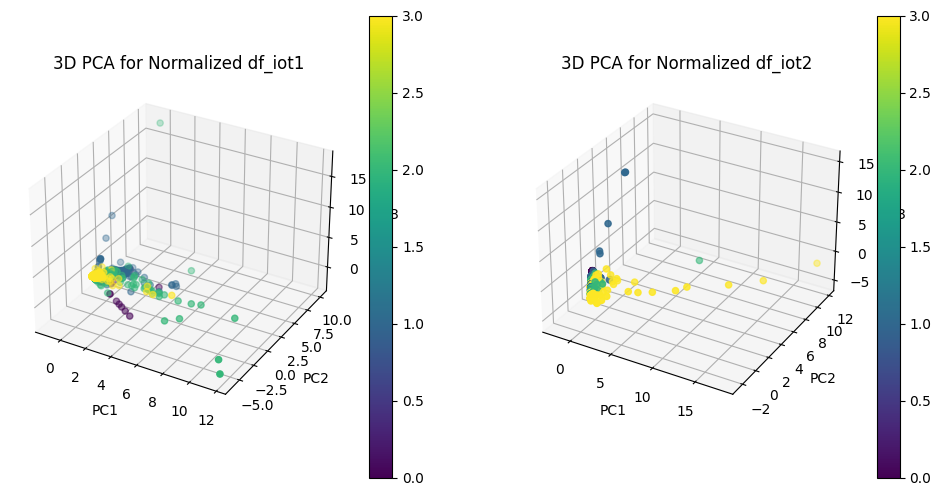

In [17]:
# Normalizing the datasets (excluding ProtocolName for PCA)
features_iot1 = iot1_dataframe.drop(columns=['ProtocolName'])
features_iot2 = iot2_dataframe.drop(columns=['ProtocolName'])

scaler = StandardScaler()
normalized_iot1 = scaler.fit_transform(features_iot1)
normalized_iot2 = scaler.fit_transform(features_iot2)

# Performing PCA for normalized datasets
pca1 = PCA(n_components=3)
principalComponents1 = pca1.fit_transform(normalized_iot1)

pca2 = PCA(n_components=3)
principalComponents2 = pca2.fit_transform(normalized_iot2)

# Plotting the 3D scatter plots for normalized datasets with color according to ProtocolName
fig = plt.figure(figsize=(12, 6))

# Plot for df_iot1
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('3D PCA for Normalized df_iot1')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
scatter1 = ax1.scatter(principalComponents1[:, 0], principalComponents1[:, 1], principalComponents1[:, 2],
                       c=iot1_dataframe['ProtocolName_encoded'].values, cmap='viridis', marker='o')
plt.colorbar(scatter1, ax=ax1)

# Plot for df_iot2
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('3D PCA for Normalized df_iot2')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
scatter2 = ax2.scatter(principalComponents2[:, 0], principalComponents2[:, 1], principalComponents2[:, 2],
                       c=iot2_dataframe['ProtocolName_encoded'].values, cmap='viridis', marker='o')
plt.colorbar(scatter2, ax=ax2)

plt.show()

# **Estimation of distributions of featues**

In [18]:
!pip install fitter

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.2 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.6.0-py3-none-any.whl size=26054 sha256=e087476e867dd92d680f1b32ab7a44771eb79bcba126eb8c35e1c0e3ce637e04
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5aafd94463e31b343453c5cf165cea425f25c0f9
Successfully built fitter
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's depend

In [19]:
from fitter import Fitter, get_common_distributions, get_distributions

In [20]:
iot1_dataframe.columns

Index(['Total.Length.of.Bwd.Packets', 'Fwd.IAT.Min', 'Bwd.IAT.Total',
       'Down.Up.Ratio', 'act_data_pkt_fwd', 'ProtocolName',
       'ProtocolName_encoded'],
      dtype='object')

# Total.Length.of.Bwd.Packets

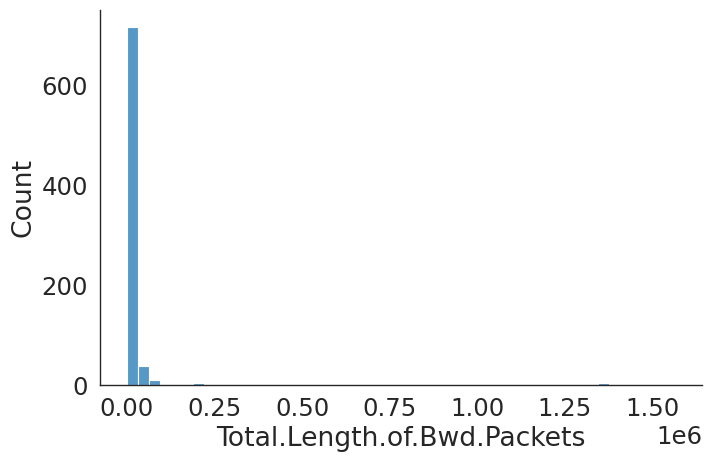

In [21]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=iot1_dataframe, x="Total.Length.of.Bwd.Packets", kind="hist", bins = 50, aspect =1.5)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:4684: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(llc, _a, x)[0]
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
tukeylambda,0.0000000005249292,8001.6720912658893212,8015.7259264488930057,inf,0.3866709975924820,0.0000000000000000
pearson3,0.0000000005684260,9389.1597543840853177,9403.2135895670890022,inf,0.4614470631215142,0.0000000000000000
gengamma,0.0000000007386493,4295.9802230033583328,4314.7186699140302153,inf,0.4645430394689446,0.0000000000000000
wald,0.0000000007694873,5811.2003300023352494,5820.5695534576707360,inf,0.4783256677891809,0.0000000000000000
gibrat,0.0000000010120330,5841.4043089657070595,5850.7735324210425460,inf,0.3549447098822354,0.0000000000000000


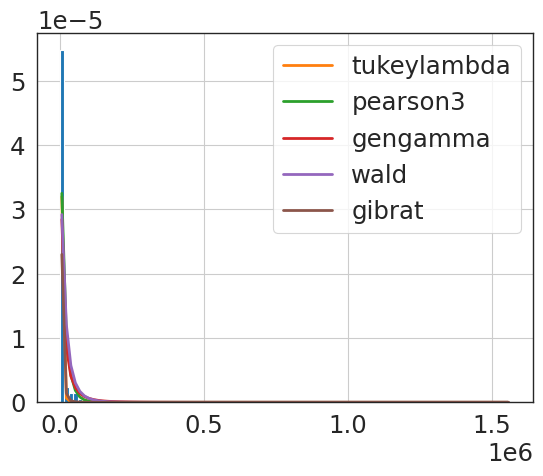

In [22]:
f = Fitter(iot1_dataframe['Total.Length.of.Bwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [23]:
f.get_best(method = 'sumsquare_error')

{'tukeylambda': {'lam': -0.07715674498894874,
  'loc': 1482.4698673686516,
  'scale': 3039.7905440316445}}

In [24]:
f.fitted_param["tukeylambda"]

(-0.07715674498894874, 1482.4698673686516, 3039.7905440316445)

# **'Fwd.IAT.Min'**

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:4684: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(llc, _a, x)[0]
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0,

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gompertz,0.0000000200028827,16395.7165249001009215,16409.7703600831046060,inf,0.4841849888710754,0.0000000000000000
truncpareto,0.0000000210855840,16107.5116026236537436,16126.2500495343247167,inf,0.4862095831054800,0.0000000000000000
expon,0.0000000210855877,16103.5129697087468230,16112.8821931640832190,inf,0.4862095900080289,0.0000000000000000
genexpon,0.0000000210855899,16109.5123936148338544,16132.9354522531739349,inf,0.4862095940322522,0.0000000000000000
pareto,0.0000000210855921,16105.5115488305254985,16119.5653840135291830,inf,0.4862095239838292,0.0000000000000000


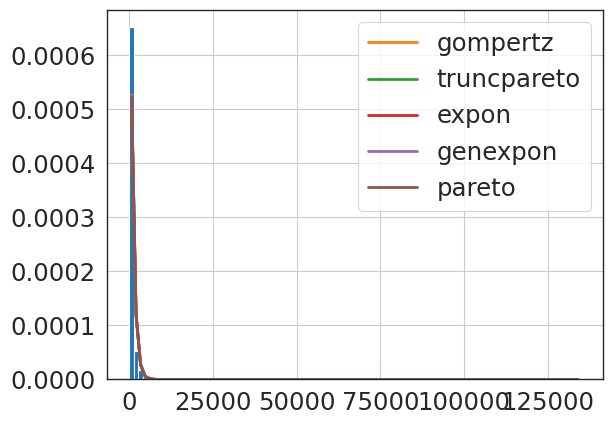

In [25]:
f = Fitter(iot1_dataframe['Fwd.IAT.Min'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [26]:
f.get_best(method = 'sumsquare_error')

{'gompertz': {'c': 600150050.5558565,
  'loc': -6.976986318437811e-06,
  'scale': 537856093958.48486}}

# 'Bwd.IAT.Total'

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:4684: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(llc, _a, x)[0]
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested to

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
skewcauchy,0.0000000000037368,3991.5801083645305880,4005.6339435475342725,inf,0.4438032263884987,0.0000000000000000
cauchy,0.0000000000059434,4070.1383401460157074,4079.5075636013516487,inf,0.4430107448385285,0.0000000000000000
gibrat,0.0000000000072487,4274.2007140843543311,4283.5699375396898176,inf,0.3460865568726058,0.0000000000000000
pearson3,0.0000000000075049,6684.6060931367310332,6698.6599283197347177,inf,0.4462773008674971,0.0000000000000000
beta,0.0000000000091640,9445.4942394341505860,9464.2326863448215590,inf,0.4274998771112107,0.0000000000000000


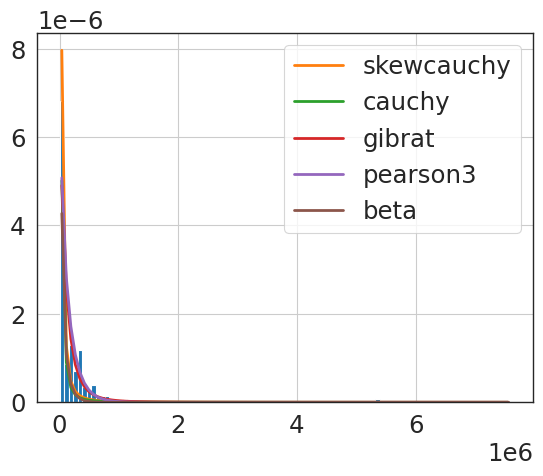

In [27]:
f = Fitter(iot1_dataframe['Bwd.IAT.Total'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [28]:
f.get_best(method = 'sumsquare_error')

{'skewcauchy': {'a': 0.9999999952146792,
  'loc': -0.0002433685116497845,
  'scale': 13769.996453325366}}

# Down.Up.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:4684: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(llc, _a, x)[0]
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3754: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = (integrate.quad(llc, x0, mean,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3756: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested t

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
betaprime,5.0016648892347666,1165.5348058569659315,1184.2732527676375867,inf,0.5249999999999995,0.0000000000000000
halfgennorm,5.8492654245336038,1021.5404500365149261,1035.5942852195187243,inf,0.5250000000000000,0.0000000000000000
burr12,6.5855527421467510,951.0670891956456217,969.8055361063172768,inf,0.5249999999103636,0.0000000000000000
gamma,6.9229548196055646,1408.5928639422443212,1422.6466991252480057,inf,0.5249995905144993,0.0000000000000000
exponweib,7.6575456234424264,879.9242802170031155,898.6627271276747706,inf,0.5249999995912945,0.0000000000000000


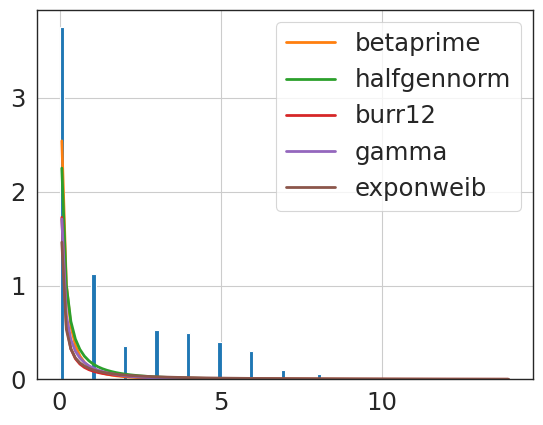

In [29]:
f = Fitter(iot1_dataframe['Down.Up.Ratio'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [30]:
f.get_best(method = 'sumsquare_error')

{'betaprime': {'a': 0.5214139375095855,
  'b': 1.6054215491328139,
  'loc': -2.0868354081974174e-30,
  'scale': 0.6213023113705849}}

## **act_data_pkt_fwd**

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1950: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1950: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achie

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
wald,0.0003642869103827,6724.2105103656913343,6733.5797338210268208,inf,0.2551099530095787,0.0000000000000000
gibrat,0.0003747609220698,3750.2547203188923959,3759.6239437742283371,inf,0.1956873856846698,0.0000000000000000
foldcauchy,0.0005076885041464,2300.3476536156999828,2314.4014887987036673,inf,0.2290202496397786,0.0000000000000000
rel_breitwigner,0.0007516929032439,2449.1227049679314405,2463.1765401509351250,inf,0.2894716798920301,0.0000000000000000
gompertz,0.0009619822088333,8621.2548530502899666,8635.3086882332936511,inf,0.4400810783793451,0.0000000000000000


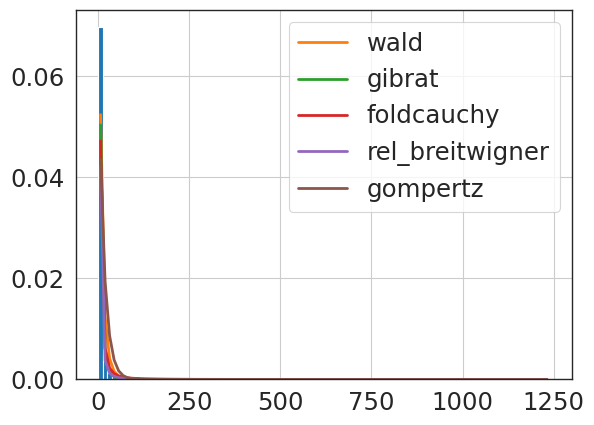

In [31]:
f = Fitter(iot1_dataframe['act_data_pkt_fwd'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [32]:
f.get_best(method = 'sumsquare_error')

{'wald': {'loc': -2.3301253742569745, 'scale': 12.090406087741943}}

# **ProtocolName_encoded**

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3754: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  intgrl = (integrate.quad(llc, x0, mean,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr12,223.0422872016841609,566.7586224061582243,585.4970693168298794,inf,0.5147313252248326,0.0000000000000000
genhyperbolic,226.0287121376904054,439.8766748754553646,463.2997335137949904,inf,0.3844205060029022,0.0000000000000000
burr,228.5356126545600546,414.6712877116219147,433.4097346222936267,inf,0.5268984293524345,0.0000000000000000
weibull_min,231.6594949002998760,442.8244117522536953,456.8782469352574935,inf,0.3651571165299228,0.0000000000000000
exponweib,231.7666961584251908,399.0935700816376084,417.8320169923093204,inf,0.5196600509592804,0.0000000000000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


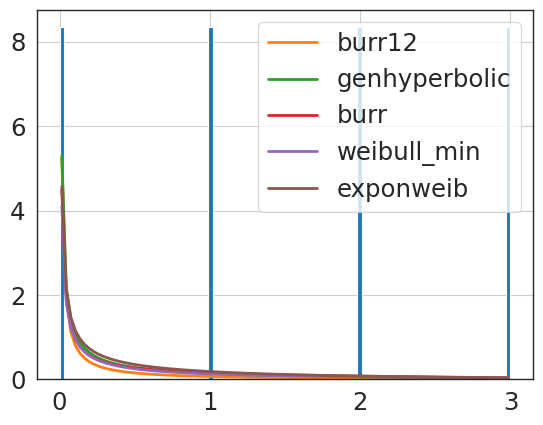

In [33]:
f = Fitter(iot1_dataframe['ProtocolName_encoded'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [34]:
f.get_best(method = 'sumsquare_error')

{'burr12': {'c': 0.2750463738339506,
  'd': 2.4788179489385946,
  'loc': -1.6480939710377278e-31,
  'scale': 2.326448412112436}}

#**Generation of the data**

## Total.Length.of.Bwd.Packets ('tukeylambda')

In [35]:
from scipy.stats import tukeylambda

In [ ]:
# Define the parameters for the Tukey-Lambda distribution
params = {'lam': -0.07715674498894874, 'loc': 1482.4698673686516, 'scale': 3039.7905440316445}

# Generate random data from the Tukey-Lambda distribution with the specified parameters
data_TotalLengthofBwdPackets = tukeylambda.rvs(**params, size=200)
list(data_TotalLengthofBwdPackets)

## Fwd.IAT.Min(gompertz)

In [ ]:
from scipy.stats import gompertz

# Define the parameters for the Gompertz distribution
params = {'c': 600150050.5558565, 'loc': -6.976986318437811e-06, 'scale': 537856093958.48486}

# Generate random data from the Gompertz distribution with the specified parameters
data_FwdIATMin = gompertz.rvs(c=params['c'], loc=params['loc'], scale=params['scale'], size=200)
data_FwdIATMin

## Bwd.IAT.Total('skewcauchy')

In [ ]:
from scipy.stats import skewcauchy

# Define the parameters for the skew Cauchy distribution
params = {'a': 0.9999999952146792, 'loc': -0.0002433685116497845, 'scale': 13769.996453325366}

# Generate random data from the skew Cauchy distribution with the specified parameters
data_BwdIATTotal = skewcauchy.rvs(a=params['a'], loc=params['loc'], scale=params['scale'], size=200)
data_BwdIATTotal

Down.Up.Ratio(betaprime)

In [ ]:
from scipy.stats import betaprime
params = {
    'a': 0.5214139375095855,
    'b': 1.6054215491328139,
    'loc': -2.0868354081974174e-30,
    'scale': 0.6213023113705849
}

# Generate random data from the beta prime distribution with the specified parameters
data_DownUpRatio = betaprime.rvs(a=params['a'], b=params['b'], loc=params['loc'], scale=params['scale'], size=200)
data_DownUpRatio

## act_data_pkt_fwd('wald')

In [60]:
from scipy.stats import wald

# Define the parameters for the Wald distribution
params = {
    'loc': -2.3301253742569745,
    'scale': 12.090406087741943
}

# Generate random data from the Wald distribution with the specified parameters
data_act_data_pkt_fwd = wald.rvs(loc=params['loc'], scale=params['scale'], size=200)
data_act_data_pkt_fwd

array([ 2.87924780e+01,  2.05989657e+01,  5.87326873e+00,  2.24365466e+01,
        1.52038964e+01, -1.38187419e+00,  2.26539800e+01,  5.78748761e+01,
        1.59165959e+00,  5.73134639e+00,  1.39674760e+01,  1.02314268e+00,
        6.73638916e+00,  2.21516555e+00,  2.60396659e+01,  4.72535502e+00,
        6.04699237e+00,  3.31169382e+00,  3.64925499e+00,  7.09892109e+00,
        7.36866457e+01,  4.20287580e+01,  4.82861997e+01,  2.97664193e+01,
       -7.81247590e-01,  9.48923282e+00,  2.54963022e+01,  1.84756089e+01,
        5.58419998e+01,  1.78503920e+00,  7.26937335e+00,  1.83926767e+00,
        1.70089786e+01,  2.02733928e+00,  1.34392467e+01,  1.50378931e+00,
        1.01076532e+00,  4.55450850e+00,  3.46951304e+00,  2.26330005e+00,
        1.42418517e+01,  3.84555872e+00,  1.35838150e+01,  5.19232092e+00,
        4.12376689e+00,  1.12391005e+01,  1.47273564e+00,  3.67034473e+00,
        6.26207983e+00,  1.16874986e+01,  6.85569165e-01,  1.10882423e+00,
        1.14174512e+01,  

## ProtocolName_encoded('burr12')

In [46]:
from scipy.stats import burr

# Define the parameters for the Burr Type XII distribution
params = {
    'c': 0.2750463738339506,
    'd': 2.4788179489385946,
    'loc': -1.6480939710377278e-31,
    'scale': 2.326448412112436
}

# Number of data points to generate
size = 200

# Generate random data from the Burr Type XII distribution with the specified parameters
data_ProtocolName_encoded = burr.rvs(c=params['c'], d=params['d'], loc=params['loc'], scale=params['scale'], size=size)


In [48]:
iot1_dataframe.columns

Index(['Total.Length.of.Bwd.Packets', 'Fwd.IAT.Min', 'Bwd.IAT.Total',
       'Down.Up.Ratio', 'act_data_pkt_fwd', 'ProtocolName',
       'ProtocolName_encoded'],
      dtype='object')

# Generated DataFrame of IoT1

In [63]:
# Create a DataFrame
data = {
    'Total.Length.of.Bwd.Packets': list(data_TotalLengthofBwdPackets),
    'Fwd.IAT.Min': list(data_FwdIATMin),
    'Bwd.IAT.Total': list(data_TotalLengthofBwdPackets),
    'Down.Up.Ratio': list(data_DownUpRatio),
    'act_data_pkt_fwd': list(data_act_data_pkt_fwd),
    'ProtocolName_encoded': list(data_ProtocolName_encoded)
}

df = pd.DataFrame(data)
df

,Total.Length.of.Bwd.Packets,Fwd.IAT.Min,Bwd.IAT.Total,Down.Up.Ratio,act_data_pkt_fwd,ProtocolName_encoded
0,-4275.8972569902725809,648.3003695983970829,-4275.8972569902725809,0.0109596774381098,28.7924779975691862,151.3897986157617197
1,-8458.1574651463779446,1797.6953496839987565,-8458.1574651463779446,0.0023741368102917,20.5989656613230210,272420.6814313181093894
2,-1933.9131407978602510,146.8540442190837609,-1933.9131407978602510,0.3396711387547272,5.8732687329889597,4.7074328335048765
3,738.6221523745647346,221.0678843895074692,738.6221523745647346,0.0020976919609504,22.4365465995956512,254.9378678633804043
4,2607.5965877338544487,92.1819845257778923,2607.5965877338544487,0.0007317594492438,15.2038964369358514,193.4352948028493131
...,...,...,...,...,...,...
195,9960.7924956665956415,696.8318934064835730,9960.7924956665956415,0.0008449081748832,4.6222677130193555,124.7376586202627209
196,868.4052139773123145,69.5105127248112069,868.4052139773123145,0.7263712259457957,6.4972447926471322,74.6133280620979065
197,-3565.0120060361159631,4982.8730205288711659,-3565.0120060361159631,0.0162525871416371,5.0333033473131854,598.8965320074490819
198,3378.3073627639291772,40.5960418799948002,3378.3073627639291772,0.0033770650939675,1.9784852066417189,543.5423825488358034


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: I

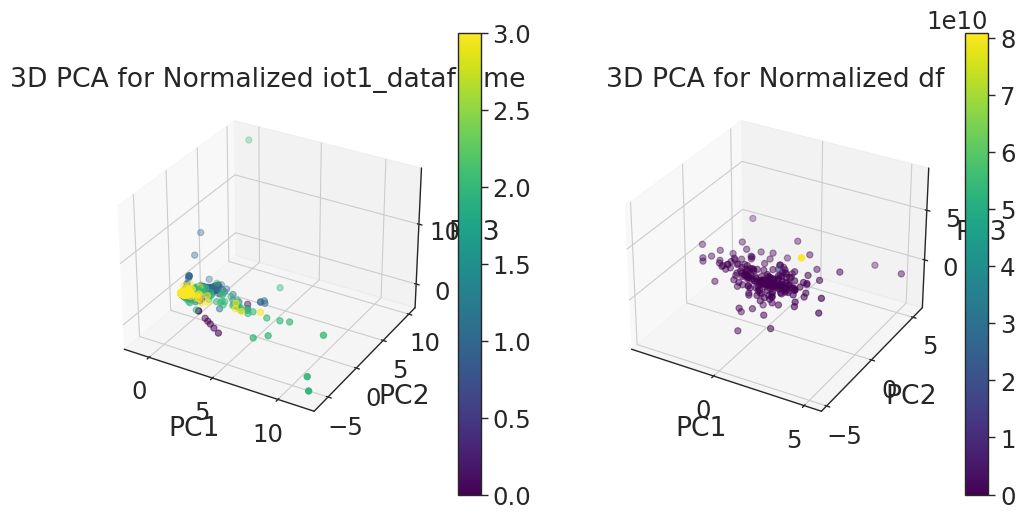

In [67]:
# Normalizing the datasets (excluding ProtocolName for PCA)
features_iot1 = iot1_dataframe.drop(columns=['ProtocolName'])
features_df = df

scaler = StandardScaler()
normalized_iot1 = scaler.fit_transform(features_iot1)
normalized_df = scaler.fit_transform(features_df)

# Performing PCA for normalized datasets
pca1 = PCA(n_components=3)
principalComponents1 = pca1.fit_transform(normalized_iot1)

pca2 = PCA(n_components=3)
principalComponents2 = pca2.fit_transform(normalized_df)

# Plotting the 3D scatter plots for normalized datasets with color according to ProtocolName_encoded
fig = plt.figure(figsize=(12, 6))

# Plot for iot1_dataframe
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('3D PCA for Normalized iot1_dataframe')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
scatter1 = ax1.scatter(principalComponents1[:, 0], principalComponents1[:, 1], principalComponents1[:, 2],
                       c=iot1_dataframe['ProtocolName_encoded'].values, cmap='viridis', marker='o')
plt.colorbar(scatter1, ax=ax1)

# Plot for df
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('3D PCA for Normalized df')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
scatter2 = ax2.scatter(principalComponents2[:, 0], principalComponents2[:, 1], principalComponents2[:, 2],
                       c=df['ProtocolName_encoded'].values, cmap='viridis', marker='o')
plt.colorbar(scatter2, ax=ax2)

plt.show()